# Load data

In [1]:
from utils import load_bts_data

df = load_bts_data(separate=False)

df

,YEAR,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_CITY_MARKET_ID,ORIGIN_CITY_NAME,ORIGIN_STATE_FIPS,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_CITY_MARKET_ID,DEST_CITY_NAME,DEST_STATE_FIPS,DEST_WAC,CRS_DEP_TIME,ARR_DEL15,DISTANCE
0,2017,1,5,AA,N001AA,2571,11298,30194,"Dallas/Fort Worth, TX",48,74,14524,34524,"Richmond, VA",51,38,705,0.0,1158.0
1,2017,1,5,AA,N001AA,2603,14524,34524,"Richmond, VA",51,38,11298,30194,"Dallas/Fort Worth, TX",48,74,1145,0.0,1158.0
2,2017,1,5,AA,N001AA,386,11298,30194,"Dallas/Fort Worth, TX",48,74,12451,31136,"Jacksonville, FL",12,33,1510,0.0,918.0
3,2017,1,5,AA,N001AA,386,12451,31136,"Jacksonville, FL",12,33,11298,30194,"Dallas/Fort Worth, TX",48,74,1925,0.0,918.0
4,2017,1,5,AA,N002AA,2197,11042,30647,"Cleveland, OH",39,44,11298,30194,"Dallas/Fort Worth, TX",48,74,1125,0.0,1021.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1345612,2021,30,4,WN,N969WN,437,12954,32575,"Long Beach, CA",6,91,13796,32457,"Oakland, CA",6,91,1455,1.0,353.0
1345613,2021,30,4,WN,N969WN,437,13198,33198,"Kansas City, MO",29,64,10423,30423,"Austin, TX",48,74,1025,1.0,650.0
1345614,2021,30,4,WN,N969WN,438,13796,32457,"Oakland, CA",6,91,12954,32575,"Long Beach, CA",6,91,1655,1.0,353.0
1345615,2021,30,4,WN,N969WN,439,12954,32575,"Long Beach, CA",6,91,13796,32457,"Oakland, CA",6,91,1855,1.0,353.0


# Encode string columns with ordinal encoder

In [3]:
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd

# get the string columns
cat_cols = df.drop(columns=['ARR_DEL15', 'DISTANCE']).columns.tolist()


# Fit and transform the encoder on the selected columns
encoder = OrdinalEncoder()
encoded_cols = encoder.fit_transform(df[cat_cols])

# Convert the encoded columns to a DataFrame
encoded_df = pd.DataFrame(encoded_cols, columns=cat_cols)

# Drop the original columns from the DataFrame
df = df.drop(columns=cat_cols)

# Concatenate the encoded columns with the remaining columns
df = pd.concat([df, encoded_df], axis=1)

df

,ARR_DEL15,DISTANCE,YEAR,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_CITY_MARKET_ID,ORIGIN_CITY_NAME,ORIGIN_STATE_FIPS,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_CITY_MARKET_ID,DEST_CITY_NAME,DEST_STATE_FIPS,DEST_WAC,CRS_DEP_TIME
0,0.0,1158.0,0.0,0.0,4.0,0.0,115.0,2568.0,93.0,17.0,80.0,41.0,40.0,279.0,275.0,267.0,44.0,19.0,298.0
1,0.0,1158.0,0.0,0.0,4.0,0.0,115.0,2600.0,279.0,275.0,267.0,44.0,19.0,93.0,17.0,80.0,41.0,40.0,578.0
2,0.0,918.0,0.0,0.0,4.0,0.0,115.0,385.0,93.0,17.0,80.0,41.0,40.0,169.0,94.0,153.0,7.0,14.0,783.0
3,0.0,918.0,0.0,0.0,4.0,0.0,115.0,385.0,169.0,94.0,153.0,7.0,14.0,93.0,17.0,80.0,41.0,40.0,1038.0
4,0.0,1021.0,0.0,0.0,4.0,0.0,116.0,2194.0,70.0,55.0,66.0,33.0,24.0,93.0,17.0,80.0,41.0,40.0,558.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1345612,1.0,353.0,4.0,28.0,3.0,9.0,5863.0,436.0,192.0,187.0,186.0,4.0,49.0,231.0,177.0,229.0,4.0,49.0,768.0
1345613,1.0,650.0,4.0,28.0,3.0,9.0,5863.0,436.0,202.0,211.0,161.0,23.0,33.0,23.0,33.0,22.0,41.0,40.0,498.0
1345614,1.0,353.0,4.0,28.0,3.0,9.0,5863.0,437.0,231.0,177.0,229.0,4.0,49.0,192.0,187.0,186.0,4.0,49.0,888.0
1345615,1.0,353.0,4.0,28.0,3.0,9.0,5863.0,438.0,192.0,187.0,186.0,4.0,49.0,231.0,177.0,229.0,4.0,49.0,1008.0


# Visualizing imbalanced classes

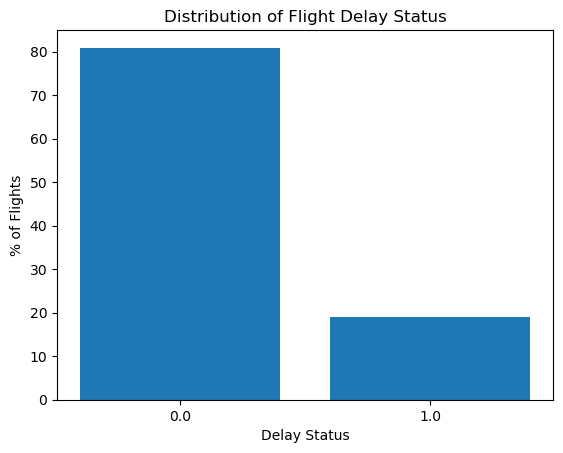

In [3]:
import matplotlib.pyplot as plt

# Get the percentage of each unique value in ARR_DEL15 column
delays_percentages = df['ARR_DEL15'].value_counts(normalize=True) * 100

# Plot the percentages
plt.bar(delays_percentages.index.astype(str), delays_percentages.values)
plt.xlabel('Delay Status')
plt.ylabel('% of Flights')
plt.title('Distribution of Flight Delay Status')
plt.show()

# Make balanced DataFrame


In [4]:
import pandas as pd
# Determine the class with the fewer samples.
counts = df['ARR_DEL15'].value_counts()
minority_class = counts.idxmin()
minority_count = counts[minority_class]

# Select a random sample of the larger class with the same size as the smaller class.
majority_class = 1 - minority_class
majority_count = counts[majority_class]
majority_sample = df[df['ARR_DEL15'] == majority_class].sample(n=minority_count, random_state=0)

# Combine the two classes into a single DataFrame.
minority_df = df[df['ARR_DEL15'] == minority_class]
balanced_df = pd.concat([minority_df, majority_sample], axis=0)
balanced_df['ARR_DEL15'].value_counts()

1.0    256672
0.0    256672
Name: ARR_DEL15, dtype: int64

In [5]:
from sklearn.model_selection import train_test_split
# stratify make the split also balanced
X_train, X_test, y_train, y_test = train_test_split(balanced_df.drop(columns=['ARR_DEL15']), balanced_df['ARR_DEL15'], test_size=0.2, stratify=balanced_df['ARR_DEL15'], random_state=0)

# RFE

Optimal number of features: 18
Selected features: Index(['DISTANCE', 'YEAR', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'OP_UNIQUE_CARRIER',
       'TAIL_NUM', 'OP_CARRIER_FL_NUM', 'ORIGIN_AIRPORT_ID',
       'ORIGIN_CITY_MARKET_ID', 'ORIGIN_CITY_NAME', 'ORIGIN_STATE_FIPS',
       'ORIGIN_WAC', 'DEST_AIRPORT_ID', 'DEST_CITY_MARKET_ID',
       'DEST_CITY_NAME', 'DEST_STATE_FIPS', 'DEST_WAC', 'CRS_DEP_TIME'],
      dtype='object')


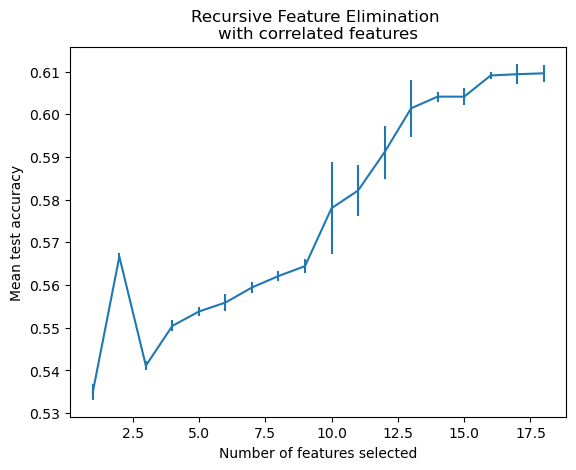

In [6]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

min_features_to_select = 1  # Minimum number of features to consider
clf = DecisionTreeClassifier()
cv = StratifiedKFold(5)

rfecv = RFECV(
    estimator=clf,
    cv=cv,
    scoring="accuracy",
    min_features_to_select=min_features_to_select,
    verbose=1, 
    n_jobs=-1,
)
rfecv.fit(X_train, y_train)

print(f"Optimal number of features: {rfecv.n_features_}")
print("Selected features:", X_train.columns[rfecv.support_])


n_scores = len(rfecv.cv_results_["mean_test_score"])
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean test accuracy")
plt.errorbar(
    range(min_features_to_select, n_scores + min_features_to_select),
    rfecv.cv_results_["mean_test_score"],
    yerr=rfecv.cv_results_["std_test_score"],
)
plt.title("Recursive Feature Elimination \nwith correlated features")
plt.show()



# Regular decision tree

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth': [i for i in range(1,45 ,1)]}

clf = DecisionTreeClassifier()

grid_search = GridSearchCV(clf, param_grid, cv=5, verbose=3, n_jobs=-1)

# Fit the grid search object to the training data
grid_search.fit(X_train, y_train)

# Print the best depth found by the grid search
print("Best depth:", grid_search.best_params_['max_depth'])

Fitting 5 folds for each of 44 candidates, totalling 220 fits
Best depth: 13


Tree Depth:  13
Number of leaves:  5535
Accuracy: 0.6522027096786761
              precision    recall  f1-score   support

         0.0       0.64      0.70      0.67     51335
         1.0       0.67      0.60      0.63     51334

    accuracy                           0.65    102669
   macro avg       0.65      0.65      0.65    102669
weighted avg       0.65      0.65      0.65    102669



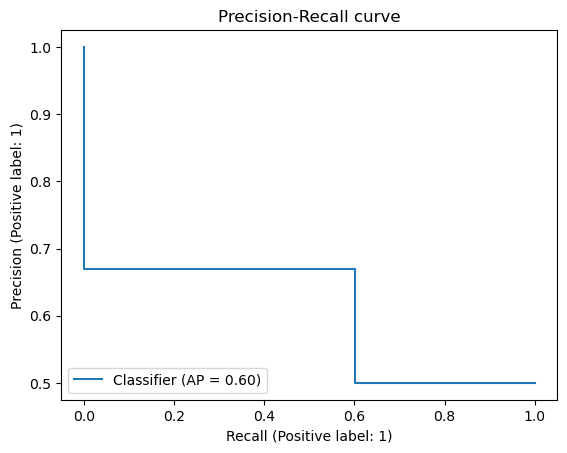

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, PrecisionRecallDisplay

# Train the decision tree classifier
clf = DecisionTreeClassifier(max_depth=13)
clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = clf.predict(X_test)
  
# Calculate the accuracy of the predictions
accuracy = accuracy_score(y_test, y_pred)

print('Tree Depth: ', clf.get_depth())
print('Number of leaves: ', clf.get_n_leaves())
print('Accuracy:', accuracy)

# print the report
print(classification_report(y_test, y_pred))

display = PrecisionRecallDisplay.from_predictions(y_test, y_pred)
_ = display.ax_.set_title("Precision-Recall curve")



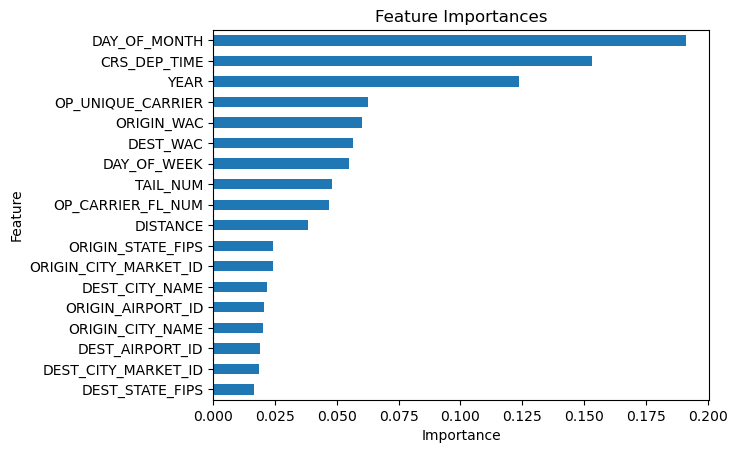

In [21]:
feature_importances = pd.Series(clf.feature_importances_, index=X_train.columns)
feature_importances.sort_values().plot(kind='barh')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

# Random forest

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a random forest classifier object
rf = RandomForestClassifier(n_estimators = 500, n_jobs=-1, verbose=2, random_state=0)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Evaluate the performance of the model
print('Accuracy Score:', accuracy_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.


building tree 1 of 500
building tree 2 of 500
building tree 3 of 500
building tree 4 of 500
building tree 5 of 500
building tree 6 of 500
building tree 7 of 500
building tree 8 of 500
building tree 9 of 500
building tree 10 of 500
building tree 11 of 500
building tree 12 of 500
building tree 13 of 500
building tree 14 of 500
building tree 15 of 500
building tree 16 of 500
building tree 17 of 500
building tree 18 of 500
building tree 19 of 500
building tree 20 of 500
building tree 21 of 500
building tree 22 of 500
building tree 23 of 500
building tree 24 of 500
building tree 25 of 500
building tree 26 of 500
building tree 27 of 500
building tree 28 of 500
building tree 29 of 500


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.0s


building tree 30 of 500
building tree 31 of 500
building tree 32 of 500
building tree 33 of 500
building tree 34 of 500
building tree 35 of 500
building tree 36 of 500
building tree 37 of 500
building tree 38 of 500
building tree 39 of 500
building tree 40 of 500
building tree 41 of 500
building tree 42 of 500
building tree 43 of 500
building tree 44 of 500
building tree 45 of 500
building tree 46 of 500
building tree 47 of 500
building tree 48 of 500
building tree 49 of 500
building tree 50 of 500
building tree 51 of 500
building tree 52 of 500
building tree 53 of 500
building tree 54 of 500
building tree 55 of 500
building tree 56 of 500
building tree 57 of 500
building tree 58 of 500
building tree 59 of 500
building tree 60 of 500
building tree 61 of 500
building tree 62 of 500
building tree 63 of 500
building tree 64 of 500
building tree 65 of 500
building tree 66 of 500
building tree 67 of 500
building tree 68 of 500
building tree 69 of 500
building tree 70 of 500
building tree 71

[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:   16.9s


building tree 149 of 500
building tree 150 of 500
building tree 151 of 500
building tree 152 of 500
building tree 153 of 500
building tree 154 of 500
building tree 155 of 500
building tree 156 of 500
building tree 157 of 500
building tree 158 of 500
building tree 159 of 500
building tree 160 of 500
building tree 161 of 500
building tree 162 of 500
building tree 163 of 500
building tree 164 of 500
building tree 165 of 500
building tree 166 of 500
building tree 167 of 500
building tree 168 of 500
building tree 169 of 500
building tree 170 of 500
building tree 171 of 500
building tree 172 of 500
building tree 173 of 500
building tree 174 of 500
building tree 175 of 500
building tree 176 of 500
building tree 177 of 500
building tree 178 of 500
building tree 179 of 500
building tree 180 of 500
building tree 181 of 500
building tree 182 of 500
building tree 183 of 500
building tree 184 of 500
building tree 185 of 500
building tree 186 of 500
building tree 187 of 500
building tree 188 of 500


[Parallel(n_jobs=-1)]: Done 333 tasks      | elapsed:   42.4s


building tree 351 of 500
building tree 352 of 500
building tree 353 of 500
building tree 354 of 500
building tree 355 of 500
building tree 356 of 500
building tree 357 of 500
building tree 358 of 500
building tree 359 of 500
building tree 360 of 500
building tree 361 of 500
building tree 362 of 500
building tree 363 of 500
building tree 364 of 500
building tree 365 of 500
building tree 366 of 500
building tree 367 of 500
building tree 368 of 500
building tree 369 of 500
building tree 370 of 500
building tree 371 of 500
building tree 372 of 500
building tree 373 of 500
building tree 374 of 500
building tree 375 of 500
building tree 376 of 500
building tree 377 of 500
building tree 378 of 500
building tree 379 of 500
building tree 380 of 500
building tree 381 of 500
building tree 382 of 500
building tree 383 of 500
building tree 384 of 500
building tree 385 of 500
building tree 386 of 500
building tree 387 of 500
building tree 388 of 500
building tree 389 of 500
building tree 390 of 500


[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  1.1min finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 130 tasks      | elapsed:    0.9s
[Parallel(n_jobs=16)]: Done 333 tasks      | elapsed:    2.6s


Accuracy Score: 0.6877441097117922
Classification Report:
               precision    recall  f1-score   support

         0.0       0.68      0.70      0.69     51335
         1.0       0.69      0.67      0.68     51334

    accuracy                           0.69    102669
   macro avg       0.69      0.69      0.69    102669
weighted avg       0.69      0.69      0.69    102669



[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    3.8s finished


# Gradient boosted tree

In [25]:
from sklearn.ensemble import HistGradientBoostingClassifier

# Instantiate the model with default hyperparameters
gbc = HistGradientBoostingClassifier(max_iter = 10000, verbose=1, random_state=0)

# Fit the model to the training data
gbc.fit(X_train, y_train)

# Predict on the test data
y_pred = gbc.predict(X_test)

# Evaluate the performance of the model
print('Accuracy Score:', accuracy_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

Binning 0.053 GB of training data: 0.304 s
Binning 0.006 GB of validation data: 0.004 s
Fitting gradient boosted rounds:
[1/10000] 1 tree, 31 leaves, max depth = 7, train loss: 0.68599, val loss: 0.68588, in 0.025s
[2/10000] 1 tree, 31 leaves, max depth = 10, train loss: 0.67986, val loss: 0.67965, in 0.023s
[3/10000] 1 tree, 31 leaves, max depth = 9, train loss: 0.67484, val loss: 0.67470, in 0.023s
[4/10000] 1 tree, 31 leaves, max depth = 7, train loss: 0.67080, val loss: 0.67067, in 0.023s
[5/10000] 1 tree, 31 leaves, max depth = 9, train loss: 0.66666, val loss: 0.66638, in 0.023s
[6/10000] 1 tree, 31 leaves, max depth = 9, train loss: 0.66326, val loss: 0.66293, in 0.022s
[7/10000] 1 tree, 31 leaves, max depth = 7, train loss: 0.66049, val loss: 0.66012, in 0.022s
[8/10000] 1 tree, 31 leaves, max depth = 9, train loss: 0.65800, val loss: 0.65764, in 0.023s
[9/10000] 1 tree, 31 leaves, max depth = 8, train loss: 0.65558, val loss: 0.65521, in 0.023s
[10/10000] 1 tree, 31 leaves, ma